In [69]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [11]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [22]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data)

In [27]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
scaled_df['crypto_names'] = df_market_data.index

# Set the coinid column as index
scaled_df.index.name = 'coin_id'

# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_names
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


---

### Find the Best Value for k Using the Original Data.

In [31]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

num_col = scaled_df.select_dtypes(include=['float64', 'int64'])

In [34]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(num_col)
    inertia_values.append(kmeans.inertia_)
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

In [82]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1,12)),
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df1 = pd.DataFrame(elbow_data)

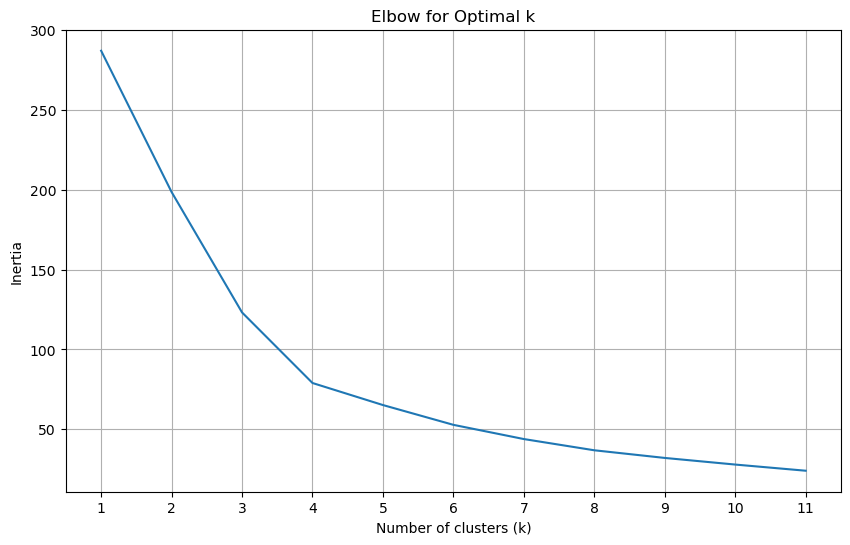

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve using hvplot with kind='line'
plt.figure(figsize=(10, 6))
plt.plot(elbow_df1['k'], elbow_df1['inertia'])
plt.title('Elbow for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 6 is the best value for 'k' as the elbow curve begins to level and stabilize. Cluster amounts past 6 show diminishing returns which would consume more processing power for less value.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [49]:
# Initialize the K-Means model using the best value for k
num_col = scaled_df.select_dtypes(include=['float64', 'int64'])

optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)

In [51]:
# Fit the K-Means model using the scaled data
kmeans.fit(num_col)

scaled_df['cluster']=kmeans.labels_

scaled_df.head()

C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_names,cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,3


In [53]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(num_col)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 4 0 0 3 0 0 4 0 3 0 4 3 0 0 0 0 0 4 3 5 0 0 2 0 4 0 1
 4 0 0 0]


In [54]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()

In [55]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_copy['predicted_clusters']=clusters

# Display sample data
scaled_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_names,cluster,predicted_clusters
coin_id,,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,3,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,3,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,3,3


In [57]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = scaled_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",  # Color the points by the predicted cluster labels
    cmap='viridis',  # Specify the colormap for coloring the points
    hover_cols=["coin_id"],  # Display the cryptocurrency name when hovering over the data points
    title="Scatter Plot with Predicted Clusters",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)


scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [88]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_features = pca.fit_transform(num_col)

pca_df1 = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df1.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [89]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
exp_var = pca.explained_variance_ratio_

for i, ev in enumerate(exp_var):
    print(f'Explained Variance for PC{i+1}: {ev: .4f}')

Explained Variance for PC1:  0.3720
Explained Variance for PC2:  0.3470
Explained Variance for PC3:  0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895

In [90]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
crypto_names=scaled_df.index

pca_df1['coin_id']=crypto_names

# Set the coinid column as index
pca_df1.set_index('coin_id', inplace=True)

# Display sample data
pca_df1.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [67]:
# Create a list with the number of k-values from 1 to 11
k_val = list(range(1,11))

In [91]:
# Create an empty list to store the inertia values
inertia_val = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, n_init=10, random_state=42)
    
    kmeans.fit(pca_df1[['PC1', 'PC2', 'PC3']])
    
    inertia_val.append(kmeans.inertia_)
    
print(inertia_val)

C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

[256.87408556789234, 165.90199402035998, 93.77462568057297, 49.665496651797355, 37.83946598681242, 30.777746141441177, 21.134056037473613, 17.091636643864746, 13.681139692992748, 10.630647573870963]


In [85]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 11)),
    'inertia': inertia_val
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data)

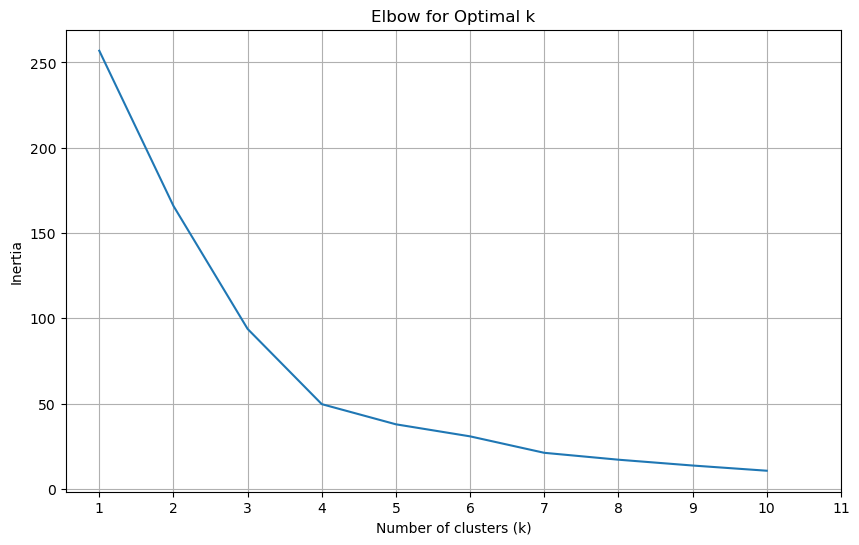

In [86]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df2['k'], elbow_df2['inertia'])
plt.title('Elbow for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 7


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)

In [94]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])

C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10, random_state=42)

In [79]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print(clusters)

[0 0 4 4 6 0 0 0 0 4 2 4 4 6 4 0 2 4 0 4 2 0 4 4 4 4 4 2 0 5 4 4 1 0 2 4 3
 2 4 4 4]


In [95]:
# Create a copy of the DataFrame with the PCA data
pca_df2 = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters


# Display sample data
pca_df2.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,4
ripple,-0.471835,-0.222660,-0.479053,4
bitcoin-cash,-1.157800,2.041209,1.859715,6


In [96]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df2.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='predicted_cluster',  # Color the points with the predicted cluster labels
    cmap='viridis',  # Specify the colormap for coloring the points
    hover_cols=["coin_id"],  # Display the cryptocurrency name when hovering over the data points
    title="Scatter Plot with Predicted Clusters",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)"
)

scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [87]:
# Composite plot to contrast the Elbow curves
plot1 = elbow_df1.hvplot.line(x='k', y='inertia', line_width=2, label='Dataset 1')
plot2 = elbow_df2.hvplot.line(x='k', y='inertia', line_width=2, label='Dataset 2')

# Overlay the line plots in a single plot
composite_plot = (plot1 * plot2).opts(title="Comparison of Elbow Curves", xlabel="Number of Clusters (k)", ylabel="Inertia")

# Display the composite plot
composite_plot

:Overlay
   .Curve.Dataset_1 :Curve   [k]   (inertia)
   .Curve.Dataset_2 :Curve   [k]   (inertia)

In [97]:
# Composite plot to contrast the clusters
scatter_plot1 = pca_df1.hvplot.scatter(x='PC1', y='PC2', c='predicted_cluster', cmap='viridis', hover_cols=["coin_id"], label='Dataset 1')
scatter_plot2 = pca_df2.hvplot.scatter(x='PC1', y='PC2', c='predicted_cluster', cmap='viridis', hover_cols=["coin_id"], label='Dataset 2')

# Overlay the scatter plots in a single plot
composite_plot = (scatter_plot1 * scatter_plot2).opts(title="Comparison of Predicted Clusters", xlabel="Principal Component 1 (PC1)", ylabel="Principal Component 2 (PC2)")

# Display the composite plot
composite_plot

:Overlay
   .Scatter.Dataset_1 :Scatter   [PC1]   (PC2,coin_id)
   .Scatter.Dataset_2 :Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 